In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)


## Классификация с использованием решающего дерева

Для классификации мы будем использовать датасет `load_iris()` из библиотеки `sklearn.datasets`. Посмотрим подробнее:

In [2]:
data = datasets.load_iris()
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = data['data']
y = data['target']

Посмотрим, сколько всего у нас классов в датасете.

In [4]:
np.unique(y)

array([0, 1, 2])

Проверим, сколько элементов каждого класса есть в датасете.

(array([50., 50., 50.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

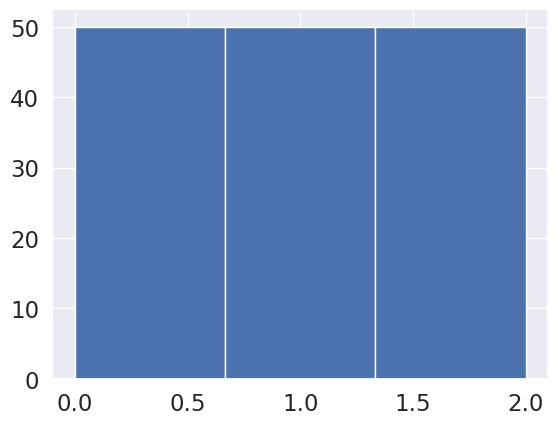

In [18]:
plt.hist(y, bins=len(np.unique(y)))

Получается, что мы имеем одинаковое кол-во элементов каждого класса. Предположите, чем будет плоха сильная дисбаллансировка классов.

**Ответ:**

1. Модель склонна предсказывать чаще встречающиеся классы, игнорируя редкие.

2. Модель может показывать низкую точность для редких классов из-за их меньшего представления в данных.

3. Метрики оценки могут быть искажены из-за дисбаланса классов.

4. Модель может переобучиться на часто встречающиеся классы.

Сопоставим каждому классу цвет.

In [20]:
colors = ListedColormap(['#FF3300', '#0099CC', '#00CC66'])

Посмотрим на данные.

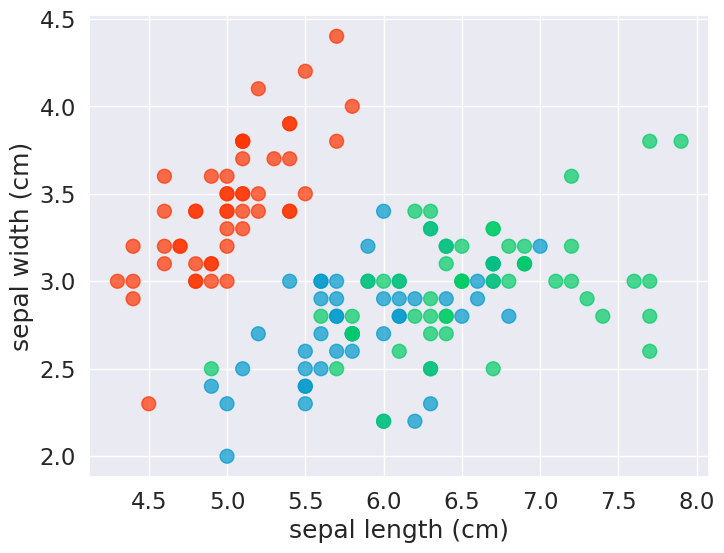

In [7]:
plt.figure(figsize=(8, 6))
grid_x1 = X[:, 0]
grid_x2 = X[:, 1]
plt.scatter(grid_x1, grid_x2, c=y, cmap=colors, s=100, alpha=0.7)
plt.xlabel(data['feature_names'][0])
plt.ylabel(data['feature_names'][1]);

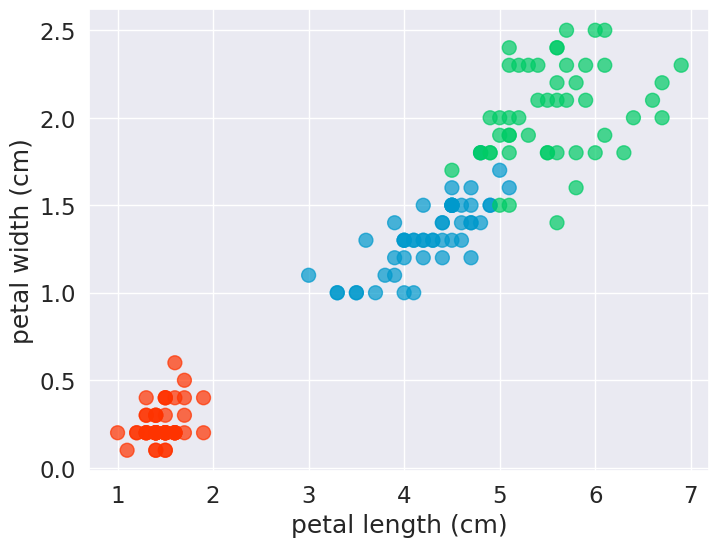

In [19]:
plt.figure(figsize=(8, 6))
grid_x1 = X[:, 2]
grid_x2 = X[:, 3]
plt.scatter(grid_x1, grid_x2, c=y, cmap=colors, s=100, alpha=0.7)
plt.xlabel(data['feature_names'][2])
plt.ylabel(data['feature_names'][3]);

Какой вывод можно сделать из полученных графиков?

**Ответ:**

1. Классы на графиках отчетливо различимы, что является хорошим знаком для обучения модели.

2. Есть небольшие пересечения классов, что может привести к некоторой неоднозначности в классификации.

3. Нет явных выбросов, что говорит о чистоте данных.

Разделим выборку на обучающую и тестовую

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)

Инициализируем и обучим решающее дерево для классификации.

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Выведите параметры дерева с помощью функции `get_params()`.


In [11]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Сделаем предсказание и оценим качество модели.

In [12]:
predictions = clf.predict(X_test)
print('test accuracy:', accuracy_score(predictions, y_test))

test accuracy: 0.9777777777777777


Визуализируйте дерево с помощью `sklearn.tree.plot_tree()`.

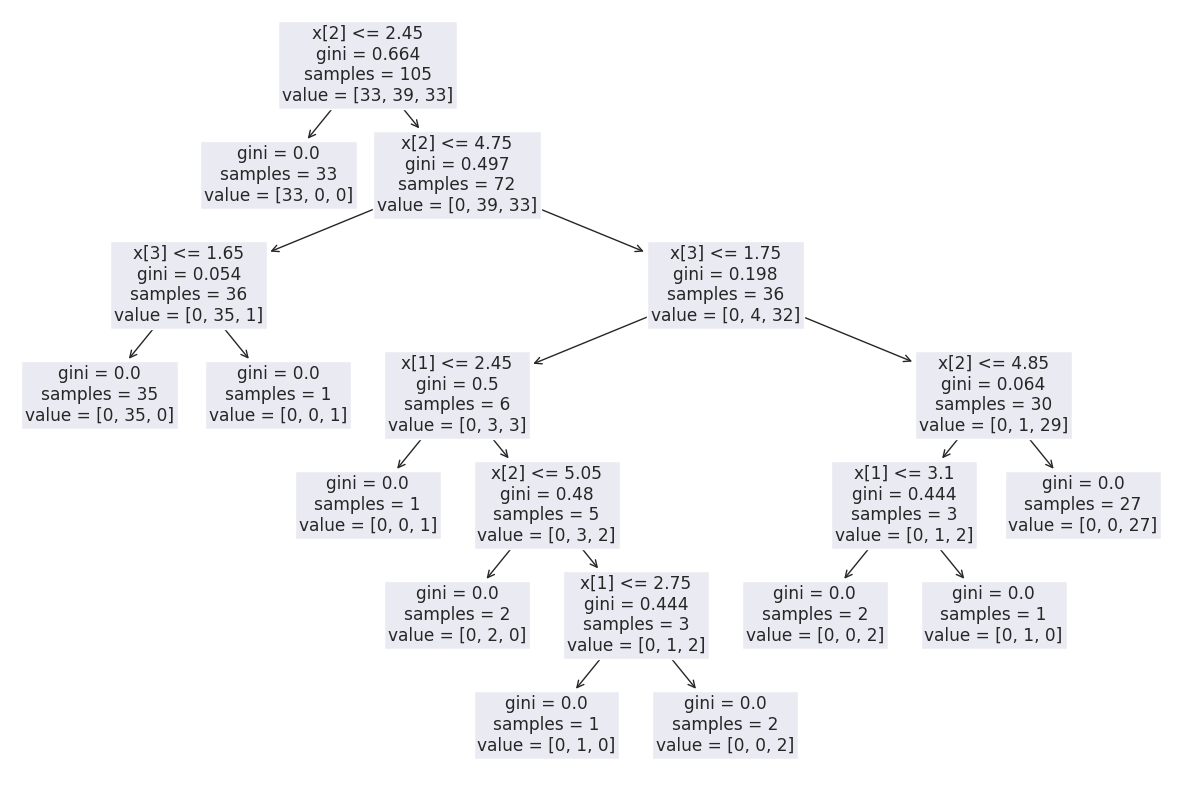

In [13]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf)
plt.show()

Поменяйте параметр max_depth, заново обучите классификатор и визуализируйте получившееся дерево/деревья. Сделайте вывод - за что отвечает параметр?

In [14]:
clf_2 = DecisionTreeClassifier(random_state = 42, max_depth = 5)
clf_2.fit(X_train, y_train)
predictions = clf_2.predict(X_test)
print('test accuracy:', accuracy_score(predictions, y_test))

test accuracy: 1.0


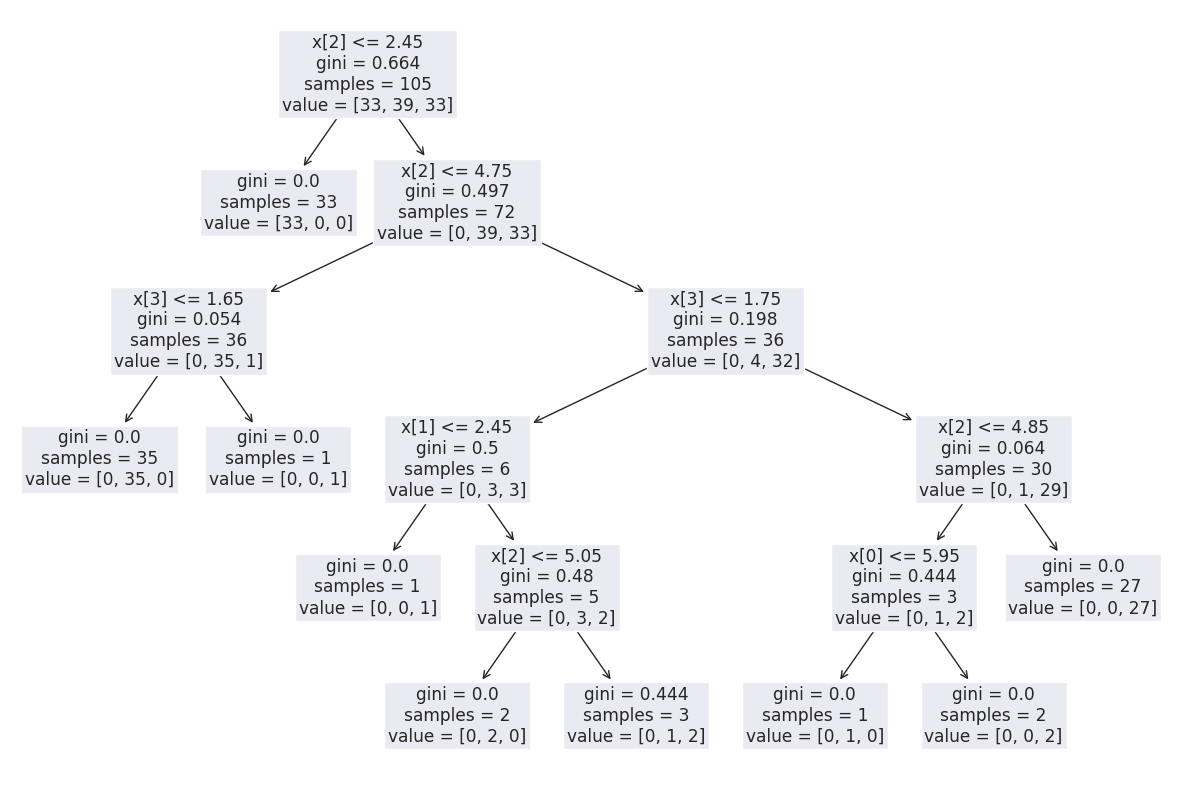

In [15]:
plt.figure(figsize = (15, 10))
tree.plot_tree(clf_2)
plt.show()

**Ответ:**

Параметр max_depth отвечает за максимальную глубину дерева.

Сделайте то же для параметры min_samples_leaf. За что он отвечает?


In [16]:
clf_3 = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 5)
clf_3.fit(X_train, y_train)
predictions = clf_3.predict(X_test)
print('test accuracy:', accuracy_score(predictions, y_test))

test accuracy: 0.9777777777777777


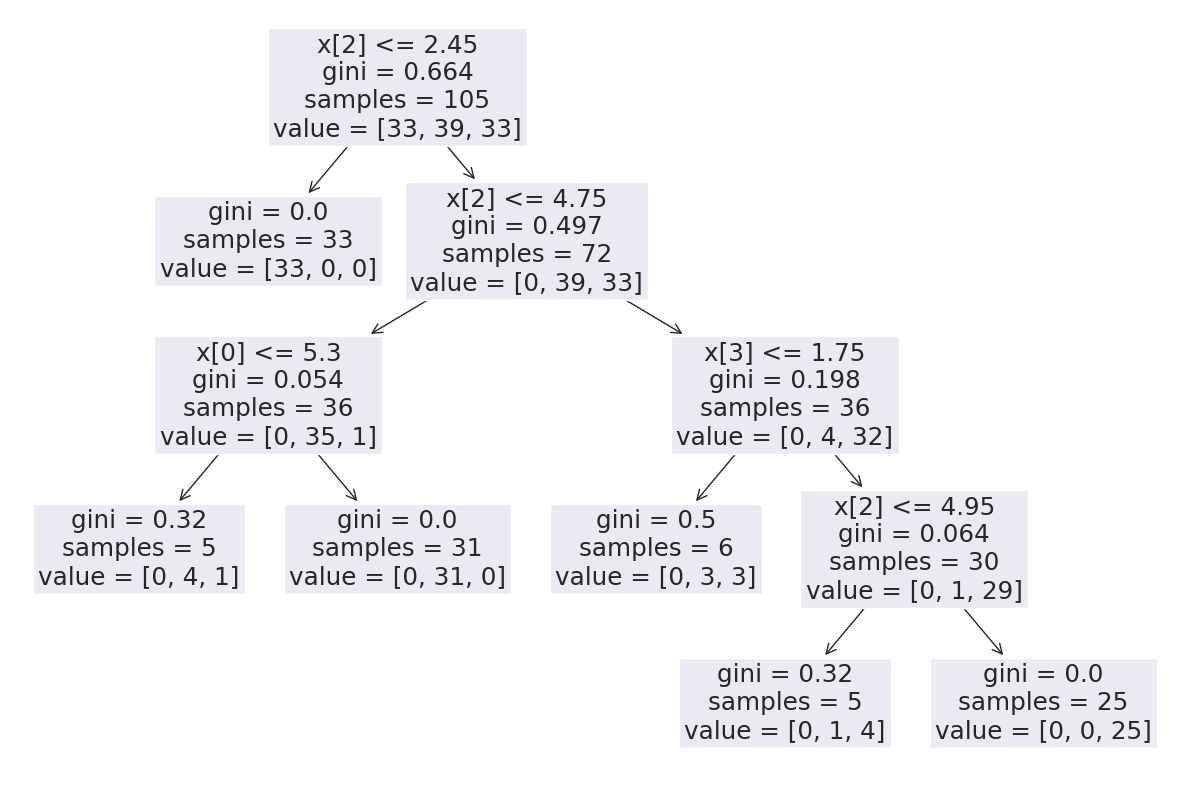

In [17]:
plt.figure(figsize = (15, 10))
tree.plot_tree(clf_3)
plt.show()

**Ответ:**

Параметр min_samples_leaf отвечает за минимальное количество элементов выборки, которое соответствует листу.